# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [20]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer;
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [3]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
files.upload()

{}

In [5]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive/My Drive/')

Mounted at /content/drive


In [55]:
price_df = pd.read_csv('/content/drive/My Drive/AI_ML_CLass/Assignments/external/DNN/Assignment/prices.csv')

In [44]:
price_df.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop null
- Drop null values if any

In [11]:
price_df.isnull().sum()
#no null data available 

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [56]:
price_df.drop(columns=['date','volume','symbol'],axis=1,inplace=True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [46]:
price_df.head(5)

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [57]:
X=price_df.drop('close',axis=1)

In [58]:
y=price_df['close']

## Question 4

### Create train and test sets
- Split the data into training and testing

In [59]:
trainX,testX,trainY,testy=train_test_split(X,y,test_size=0.3,random_state=42)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [60]:
std=StandardScaler()
std_trainX=std.fit_transform(trainX)
std_testX=std.transform(testX)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [61]:
trainNX=np.array(std_trainX)
testNX=np.array(std_testX)

In [62]:
trainNY=np.array(trainY)
testNY=np.array(testy)

In [31]:
type(testNX)

numpy.ndarray

In [32]:
type(testNY)

numpy.ndarray

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [67]:
model1 = tf.keras.models.Sequential()
#model = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(1,activation='linear'))  

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [68]:
model1.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [69]:
model1.fit(trainNX, trainNY, 
         # validation_data=(testNX, testNY),
          epochs=50,batch_size=128)

Epoch 1/50
4656/4656 [==============================] - 5s 1ms/step - loss: 41.3705 - accuracy: 1.6782e-06 - val_loss: 0.9643 - val_accuracy: 7.8315e-06
Epoch 2/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9858 - accuracy: 1.6782e-06 - val_loss: 0.9512 - val_accuracy: 7.8315e-06
Epoch 3/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9797 - accuracy: 1.6782e-06 - val_loss: 0.9391 - val_accuracy: 7.8315e-06
Epoch 4/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9699 - accuracy: 1.6782e-06 - val_loss: 0.9349 - val_accuracy: 7.8315e-06
Epoch 5/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9642 - accuracy: 1.6782e-06 - val_loss: 0.9357 - val_accuracy: 7.8315e-06
Epoch 6/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9580 - accuracy: 1.6782e-06 - val_loss: 0.9594 - val_accuracy: 7.8315e-06
Epoch 7/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9520 - ac

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [ ]:
model1.evaluate(testNX, testNY)

In [66]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [74]:
model.predict(std.transform([[123.430000, 122.30999, 116.250000]]))

array([[120.08143]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [ ]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
testX.shape

(10000, 28, 28)

### Change train and test labels into one-hot vectors

In [ ]:
np.unique(trainY)
#set(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(testY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

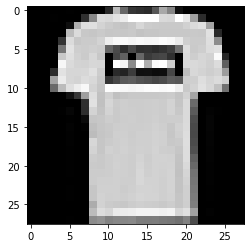

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(trainX[1],cmap='gray')

In [ ]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10) 

### Build the Graph

### Initialize model, reshape & normalize data

In [ ]:
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1) # Normalizing the Data
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255
testX /= 255 

In [ ]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()
#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [ ]:
#1st hidden layer
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
#2nd hidden layer
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [ ]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY),
          epochs=100,batch_size=100)

Epoch 1/100
600/600 [==============================] - 3s 6ms/step - loss: 0.5615 - accuracy: 0.8026 - val_loss: 0.4402 - val_accuracy: 0.8427
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.4319 - accuracy: 0.8441 - val_loss: 0.4084 - val_accuracy: 0.8563
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.4042 - accuracy: 0.8535 - val_loss: 0.3984 - val_accuracy: 0.8549
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3814 - accuracy: 0.8607 - val_loss: 0.4318 - val_accuracy: 0.8430
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3698 - accuracy: 0.8648 - val_loss: 0.3967 - val_accuracy: 0.8553
Epoch 6/100
600/600 [==============================] - 3s 6ms/step - loss: 0.3581 - accuracy: 0.8686 - val_loss: 0.3663 - val_accuracy: 0.8666
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3514 - accuracy: 0.8720 - val_loss: 0.3799 - val_accuracy: 0.8596

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               157000    
_________________________________________________________________
batch_normalization_12 (Batc (None, 200)               800       
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)               400       
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)              